In [1]:
import pandas as pd

In [2]:
brand_col = "品牌 Brand"

In [3]:
csv_file = "./processed.csv"
df = pd.read_csv(csv_file)
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df = df.drop(df.index[df.index % 10 == 0])
print(df)

brand_list = list(pd.read_csv("brand_list.csv")["brand"])
print(brand_list)

           照片 Picture 品牌 Brand 衣服長度 Clothes Length  價格 Price  毛衣、針織衣 Sweater  \
1     image_00001.jpg      H&M              長 long       999             0.0   
2     image_00002.jpg      H&M              長 long       699             0.0   
3     image_00003.jpg      H&M              長 long       999             0.0   
4     image_00004.jpg      H&M              長 long       699             0.0   
5     image_00005.jpg      H&M             短 short       499             0.0   
...               ...      ...                 ...       ...             ...   
3589  image_03589.jpg    Lativ             短 short       499             0.0   
3591  image_03591.jpg    Lativ             短 short       499             0.0   
3592  image_03592.jpg    Lativ             短 short       399             0.0   
3593  image_03593.jpg    Lativ             短 short       499             0.0   
3594  image_03594.jpg    Lativ             短 short       299             0.0   

      緊身褲 leggings  牛仔褲/裙 jeans / demi 

In [4]:
from sklearn.preprocessing import OneHotEncoder

df["brand_number"] = df[brand_col].apply(
    lambda x: brand_list.index(x) if x in brand_list else -1
)
for i in range(len(brand_list)):
    df[f"品牌 Brand_{i}"] = (df["brand_number"] == i).astype(int)

df["衣服長度 Clothes Length"] = (df["衣服長度 Clothes Length"] == "長 long").astype(int)
df = df[sorted(df.columns)]


target = "價格 Price"
y = df[target]
X = df.drop(
    columns=[
        target,
        "照片 Picture",
        "品牌 Brand",
        "衣服長度 Clothes Length",
        "brand_number",
    ]
)


print(X)

      Shirt  T-Shirt  上半身 Top  下半身 Bottom  休閒褲/裙 casual pants/skirt  \
1       1.0      0.0      1.0         0.0                       0.0   
2       0.0      0.0      0.0         0.0                       0.0   
3       0.0      0.0      0.0         1.0                       0.0   
4       0.0      0.0      0.0         1.0                       0.0   
5       0.0      0.0      0.0         1.0                       0.0   
...     ...      ...      ...         ...                       ...   
3589    0.0      0.0      0.0         1.0                       0.0   
3591    0.0      0.0      0.0         1.0                       0.0   
3592    0.0      0.0      0.0         1.0                       0.0   
3593    0.0      0.0      0.0         1.0                       0.0   
3594    0.0      0.0      0.0         1.0                       0.0   

      吊帶褲/裙 overalls/jumper skirt  品牌 Brand_0  品牌 Brand_1  品牌 Brand_10  \
1                             0.0           0           0            0   

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
import numpy as np

x_train = np.array(X_train)
x_test = np.array(X_test)
print(x_train.shape)
print(x_test.shape)

(2588, 41)
(647, 41)


In [34]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential(
    [
        Dense(256, activation="relu", input_shape=(41,)),
        Dropout(0.3),
        Dense(128, activation="relu"),
        Dropout(0.2),
        Dense(64, activation="relu"),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1),
    ]
)
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["mean_absolute_error"],  # Useful for interpreting regression performance
)

C:\Users\doo12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True)
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=1500,  # Adjust based on performance
    batch_size=32,  # Common starting point; tune for your data
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/1500


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6176281.0000 - mean_absolute_error: 1639.5560 - val_loss: 2016146.6250 - val_mean_absolute_error: 944.7754
Epoch 2/1500
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2442692.5000 - mean_absolute_error: 944.3782 - val_loss: 1159436.1250 - val_mean_absolute_error: 685.4685
Epoch 3/1500
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 1373740.7500 - mean_absolute_error: 638.0717 - val_loss: 890585.3125 - val_mean_absolute_error: 544.6675
Epoch 4/1500
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 930193.0625 - mean_absolute_error: 526.2962 - val_loss: 804666.1875 - val_mean_absolute_error: 511.0252
Epoch 5/1500
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 1096652.2500 - mean_absolute_error: 546.5175 - val_loss: 795695.8125 - val_mean_absolute_error: 505.9269
Epoch 6/1500
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 1122854.1250 - mean_absolute_error: 536.4461 - val_loss: 725142.8750 - val_mean_absolute_error: 480.4171
Epoch 7/1500
8

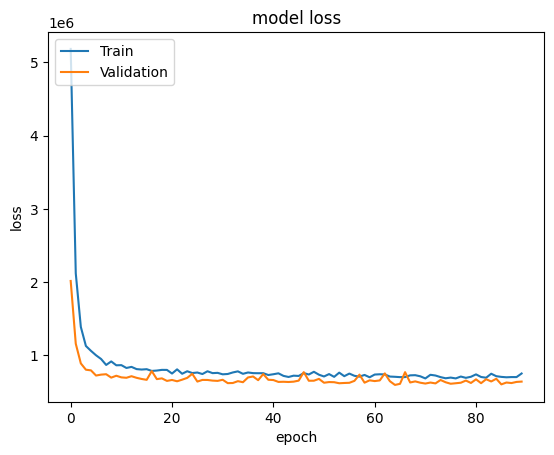

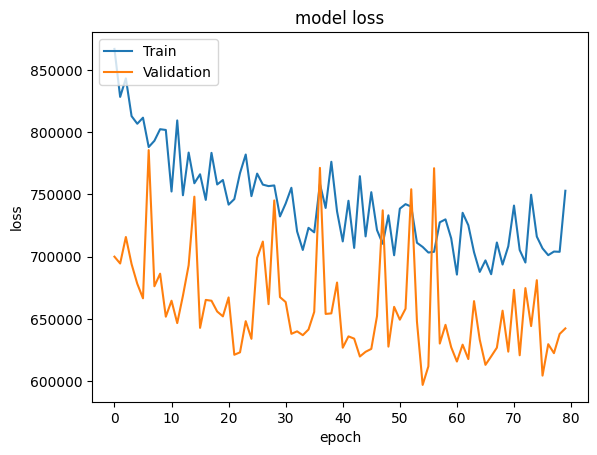

In [36]:
import matplotlib.pyplot as plt


# summarize history for loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()


plt.plot(history.history["loss"][10:])
plt.plot(history.history["val_loss"][10:])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [37]:
y_pred = model.predict(x_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [38]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mae:", mae)
print("mse:", mse)
print("mape:", mape)
print("r2:", r2)

mae: 416.0095848307543
mse: 596995.9027057393
mape: 0.2726614377114851
r2: 0.7711606025695801


In [39]:
import os

model_folder = "models"
name = "model_prediction.keras"
model.save(os.path.join(model_folder, name))